In [1]:
#analysis of returns of major energy and mining companies in India with data obtained from yahoo finance
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
cf.go_offline()
                   

In [2]:
import pandas as pd
from pandas_datareader import data

symbol = 'BHARTIARTL.NS'
data_source='yahoo'
start_date = '2009-01-01'
end_date = '2019-12-31'

dfairtel = data.DataReader(symbol, data_source, start_date, end_date)



In [3]:
symbol = 'ADANIPORTS.NS'
data_source='yahoo'
start_date = '2009-01-01'
end_date = '2019-12-31'

dfadani = data.DataReader(symbol, data_source, start_date, end_date)

In [4]:
symbol = 'GRASIM.NS'
data_source='yahoo'
start_date = '2009-01-01'
end_date = '2019-12-31'

dfgrasim = data.DataReader(symbol, data_source, start_date, end_date)

In [5]:
symbol = 'INFRATEL.NS'
data_source='yahoo'
start_date = '2009-01-01'
end_date = '2019-12-31'

dfinfratel = data.DataReader(symbol, data_source, start_date, end_date)

In [6]:
symbol = 'UPL.NS'
data_source='yahoo'
start_date = '2009-01-01'
end_date = '2019-12-31'

dfupl = data.DataReader(symbol, data_source, start_date, end_date)

In [7]:
symbol = 'ASIANPAINT.NS'
data_source='yahoo'
start_date = '2009-01-01'
end_date = '2019-12-31'

dfasianpaint = data.DataReader(symbol, data_source, start_date, end_date)

In [8]:
symbol = 'TITAN.NS'
data_source='yahoo'
start_date = '2009-01-01'
end_date = '2019-12-31'

dftitan = data.DataReader(symbol, data_source, start_date, end_date)

In [9]:
symbol = 'ZEEL.NS'
data_source='yahoo'
start_date = '2009-01-01'
end_date = '2019-12-31'

dfzee = data.DataReader(symbol, data_source, start_date, end_date)

In [10]:
df = pd.concat([dfairtel,dfadani,dfgrasim,dfinfratel,dfupl,dfasianpaint,dftitan,dfzee],keys=['AIRTEL','ADANI','GRASIM','INFRATEL','UPL','ASIANPAINT','TITAN','ZEE'],names=['CompanyName','Date'])
df.head()

High         Low        Open       Close  \
CompanyName Date                                                         
AIRTEL      2009-01-02  331.462006  320.903015  331.256012  323.612000   
            2009-01-05  327.790009  310.917999  326.067993  314.774994   
            2009-01-06  321.087006  298.981995  321.087006  301.622009   
            2009-01-07  307.084991  280.963013  305.707001  298.407990   
            2009-01-09  300.243988  278.966003  296.571991  293.312012   

                            Volume   Adj Close  
CompanyName Date                                
AIRTEL      2009-01-02   8456945.0  303.880463  
            2009-01-05  11968069.0  295.582245  
            2009-01-06  17221142.0  283.231262  
            2009-01-07  16501626.0  280.213196  
            2009-01-09  16001263.0  275.427979

In [11]:

##df.loc[(['SBI','HDFC','ICICI','AXIS'],['2009-01-02','2020-04-09']),['Close','Volume']]
df1 = df.reset_index( drop=False)

df1.head()

,CompanyName,Date,High,Low,Open,Close,Volume,Adj Close
0,AIRTEL,2009-01-02,331.462006,320.903015,331.256012,323.612000,8456945.0,303.880463
1,AIRTEL,2009-01-05,327.790009,310.917999,326.067993,314.774994,11968069.0,295.582245
2,AIRTEL,2009-01-06,321.087006,298.981995,321.087006,301.622009,17221142.0,283.231262
3,AIRTEL,2009-01-07,307.084991,280.963013,305.707001,298.407990,16501626.0,280.213196
4,AIRTEL,2009-01-09,300.243988,278.966003,296.571991,293.312012,16001263.0,275.427979


c:\users\hi\appdata\local\programs\python\python37-32\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning:

Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()



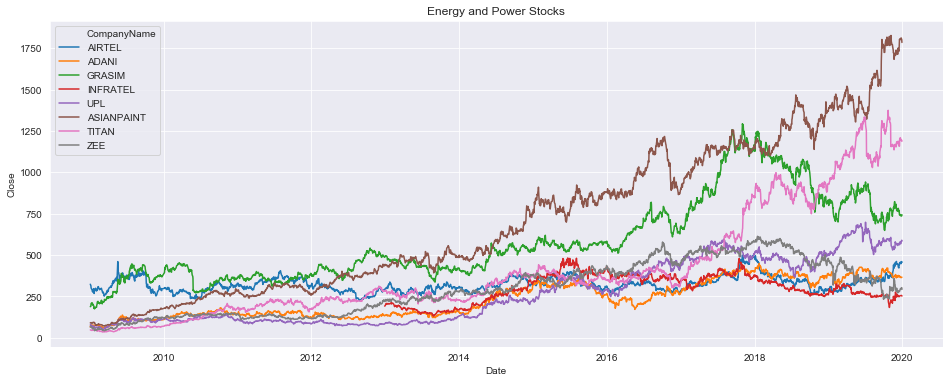

In [12]:
# this is for seaborn plots. 

import matplotlib.pyplot as plt
sns.set_style("darkgrid")
plt.figure(figsize=(16, 6))
bankplot=sns.lineplot(x='Date',y='Close',hue='CompanyName', data=df1 )
bankplot.set_title('Energy and Power Stocks')
bankplot


In [13]:
#this is for plotly plots

df1.iplot(kind='line',x='Date',y='Close',categories='CompanyName',mode='lines')

In [14]:
yearlist=[2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]
datelist=list(df1[df1['Date']=='2009-01-02']['Date'].unique())
returns=pd.DataFrame()
#returns=pd.
for i in yearlist:
    datelist.append(df1[df1['Date'].apply(lambda x:x.year)==i]['Date'].max())
    
for j in datelist:
    returns =pd.concat([returns,df1[df1['Date']==j][['CompanyName','Date','Adj Close']]])
returns.reset_index(inplace=True,drop=True)
returns.rename(columns={'Adj Close':'Price'},inplace=True)
companylist=returns['CompanyName'].unique()
returns_pct_change=pd.DataFrame()
returns.set_index(['CompanyName','Date'],inplace=True)
return_pct_change=pd.DataFrame()
for k in  companylist:
    return_pct_change = pd.concat([return_pct_change,returns.loc[k].pct_change()],axis=1)
    return_pct_change.rename(columns={'Price':k},inplace=True)
    
return_pct_change.to_excel('Assorted_stock_Returns.xlsx','Assorted')


    



In [15]:
yearlist=[2019]
datelist=list(df1[df1['Date']=='2009-01-02']['Date'].unique())
returns=pd.DataFrame()
#returns=pd.
for i in yearlist:
    datelist.append(df1[df1['Date'].apply(lambda x:x.year)==i]['Date'].max())
    
for j in datelist:
    returns =pd.concat([returns,df1[df1['Date']==j][['CompanyName','Date','Adj Close']]])
returns.reset_index(inplace=True,drop=True)
returns.rename(columns={'Adj Close':'Price'},inplace=True)
companylist=returns['CompanyName'].unique()
returns_pct_change=pd.DataFrame()
returns.set_index(['CompanyName','Date'],inplace=True)
return_pct_change_absolute=pd.DataFrame()
for k in  companylist:
    return_pct_change_absolute = pd.concat([return_pct_change_absolute,returns.loc[k].pct_change()],axis=1)
    return_pct_change_absolute.rename(columns={'Price':k},inplace=True)
    

return_pct_change_absolute.to_excel('Assorted_stocks_Returns_absolute.xlsx','Assorted')


    

